In [1]:
import pandas as pd
import seaborn as sns

# Wide data

Wide data is a dataframe where your columns **measure the same things across different categories**. In the example below, we have the number of accidents (our measurement) across different months (our categories).

In [19]:
wide_df = pd.DataFrame({
    'category': ['car', 'bus', 'plane', 'horse', 'submarine', 'train', 'subway', 'spaceship'],
    'JAN': [1, 4, 3, 2, 6, 2, 4, 5],
    'FEB': [3, 5, 2, 2, 6, 3, 2, 4],
    'MAR': [5, 3, 3, 5, 2, 5, 6, 4]
})
wide_df

category  JAN  FEB  MAR
0        car    1    3    5
1        bus    4    5    3
2      plane    3    2    3
3      horse    2    2    5
4  submarine    6    6    2
5      train    2    3    5
6     subway    4    2    6
7  spaceship    5    4    4

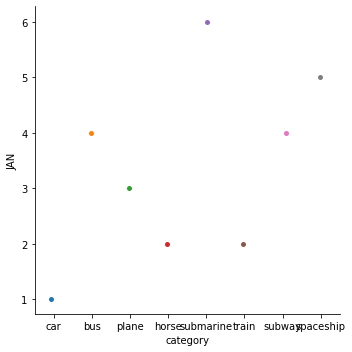

In [23]:
# I can only plot one month at a time!
sns.catplot(data=wide_df, y='JAN', x='category')

Wide data is great for stacked bar graphs, but for everything else it can be a real pain (especially with seaborn). Most of the software you'll use to graph loves **long data** instead.

# Long data

Long data is similar to the idea of [tidy data](https://en.wikipedia.org/wiki/Tidy_data) which is very very popular in current-day R programming. Basically speaking, each row is a measurement.

To convert from wide data to long data, you use `.melt`. I think you can figure out what the columns mean based on what's down below!

In [27]:
long_df = wide_df.melt(id_vars=['category'],
                       value_vars=['JAN', 'FEB', 'MAR'],
                       var_name='month',
                       value_name='accidents')
long_df

category month  accidents
0         car   JAN          1
1         bus   JAN          4
2       plane   JAN          3
3       horse   JAN          2
4   submarine   JAN          6
5       train   JAN          2
6      subway   JAN          4
7   spaceship   JAN          5
8         car   FEB          3
9         bus   FEB          5
10      plane   FEB          2
11      horse   FEB          2
12  submarine   FEB          6
13      train   FEB          3
14     subway   FEB          2
15  spaceship   FEB          4
16        car   MAR          5
17        bus   MAR          3
18      plane   MAR          3
19      horse   MAR          5
20  submarine   MAR          2
21      train   MAR          5
22     subway   MAR          6
23  spaceship   MAR          4

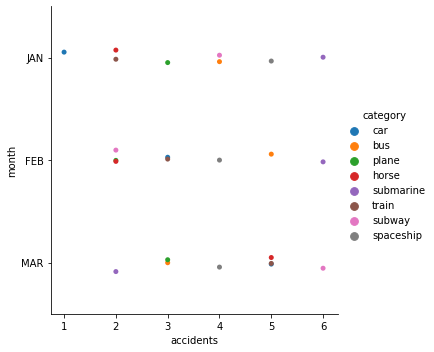

In [28]:
# Now I can plot whatever I want!
sns.catplot(data=long_df, y='month', x='accidents', hue='category')

# Transposing my data

What if I wanted every one of my `categories` to be a column?

In [31]:
wide_df

category  JAN  FEB  MAR
0        car    1    3    5
1        bus    4    5    3
2      plane    3    2    3
3      horse    2    2    5
4  submarine    6    6    2
5      train    2    3    5
6     subway    4    2    6
7  spaceship    5    4    4

You can transpose with `.T` and it's close, but you don't end up with any column names.

In [32]:
wide_df.T

0    1      2      3          4      5       6          7
category  car  bus  plane  horse  submarine  train  subway  spaceship
JAN         1    4      3      2          6      2       4          5
FEB         3    5      2      2          6      3       2          4
MAR         5    3      3      5          2      5       6          4

But notice how the column names are the **index** from the original dataframe? Turns out you just need to tell it what the index should be, then transpose.

In [33]:
wide_df.set_index('category').T

category  car  bus  plane  horse  submarine  train  subway  spaceship
JAN         1    4      3      2          6      2       4          5
FEB         3    5      2      2          6      3       2          4
MAR         5    3      3      5          2      5       6          4

And then you're all set to do a nice stacked bar (actually a horrible stacked bar).

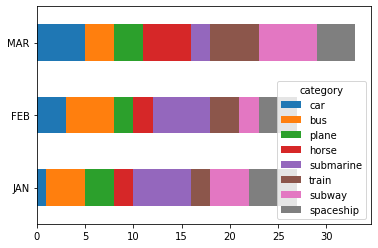

In [36]:
wide_df.set_index('category').T.plot(kind='barh', stacked=True)